In [21]:
# Basic python library imports
import math
import numpy as np
import scipy
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

import mplhep as hep
plt.style.use(hep.style.ATLAS)

import ipywidgets as widgets

# Usage Instructions

* Use "ALT+r" key combination to go to slideshow mode
* Use Spacebar (SHIFT+Spacebar) to go forward (backward) through the slideshow. 

[More info is available in the RISE documentation](https://damianavila.github.io/RISE/usage.html).

This notebook is available from https://github.com/stephensekula/joy_of_the_muon. To run in Binder, click the "Launch Binder" badge

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/stephensekula/joy_of_the_muon/master?filepath=part02_spontaneous_decay.ipynb)


<img src="Images/Pi_Glass.png" style="width: 50%; height: auto; float: right;"/>

# The Joy of the Muon
## Spontaneous Decay

### Professor Stephen Sekula (SMU) 

# Overview


* We will define spontaneous decay

* We'll build a visual model of this process that allows you to play with the concept.

* We'll explore the calculus of spontaneous decay to determine a mathematical model of the process.

# Spontaneous Decay

# A Toy Model

* Let's build a model of spontaneous decay. The elements of the model are as follows.

* We have a system consisting of $N$ independent elements at time zero ($t=0$)

* Time then advances forward in uniform steps, each of size $dt$

* In each time step, each element of the system has a contant probability $P(t) = P(t+dt) = P$ of spontaneously decaying. Since all elements are independent of each other, the decay of one has no influence on any other.

* For the model on the next slide, $N=225$ (15 per row on the game board) and $P=0.25$. Use the left button to advance time. Use the right button to reset the game and start over.

In [3]:
# The code here allows a game board to be defined, and objects placed on the board that can be blue/solid (not decayed)
# or red/unfilled (decayed). The user can step time forward using a slider, emulating evolving the system by
# a time step dt. In each time step, since each object has a constant and uncorrelated probability P of decaying,
# we'll see more and more objects decay. The user will see that the rate of decay is proportional to the number
# of objects

class Avatar:
    def __init__(self, coordinates=(0,0), size=1.0):
        self.coordinates = coordinates
        self.size = size
    def print(self):
        print(f" coordinates: {self.coordinates}, size={self.size}")
        
class Muon:
    def __init__(self, decay_prob=0.1, avatar=None):
        self.decay_prob = decay_prob
        self.decay_state = 0
        self.avatar = avatar
        
    def step(self):
        if self.decay_state == 1:
            return
        action = random.uniform(0, 1)
        if action < self.decay_prob:
            self.decay_state = 1

    def print(self):
        print(f" Decay probability: {self.decay_prob}")
        print(f" Muon decayed? {self.decay_state}")
        self.avatar.print()
        
    def draw(self):
        color = 'b'
        fill = True
        if self.decay_state == 1:
            color='r'
            fill=False
        return plt.Circle(self.avatar.coordinates, self.avatar.size, color=color, fill=fill)

global muon_list, muon_counts, muon_figure, muon_axis, muon_gameboard, muon_histogram
muon_list = []
muon_counts = np.array([])

reset_button = widgets.Button(
    description = 'Reset Game',
    layout=widgets.Layout(width='25%', height='30px')
)

advance_button = widgets.Button(
    description='Advance Time by dt',
    layout=widgets.Layout(width='25%', height='30px')
)


def draw_gameboard():
    global muon_list, muon_counts, muon_figure, muon_axis, muon_gameboard, muon_histogram
    
    muon_gameboard.cla()

    for muon in muon_list:
        muon_gameboard.add_artist(muon.draw())
    plt.xlabel('Elements')

    muon_histogram.cla()
    muon_histogram.bar(x=np.arange(0, np.size(muon_counts), 1), height=muon_counts, color='b')
    plt.xlabel('Time Step')
    plt.ylabel('Surviving Elements')
    muon_histogram.text(0.25,0.85,f"Surviving: {100*muon_counts[-1]/muon_counts[0]:.1f}%", fontsize=16, 
                        transform=muon_histogram.transAxes, ma='left',
                         bbox=dict(boxstyle="round",ec=(204/255, 0, 53/255), fc=(0.9, 0.9, 0.9))
    )

    muon_figure.canvas.draw()


@reset_button.on_click
def reset(button_object):
    global muon_list, muon_counts, muon_figure, muon_axis, muon_gameboard, muon_histogram

    muon_gameboard.cla()

    for muon in muon_list:
        muon.decay_state=0
    muon_counts = np.array([len(muon_list)])

    draw_gameboard()

@advance_button.on_click
def advance(button_object):
    global muon_list, muon_counts, muon_figure, muon_axis, muon_gameboard, muon_histogram

    count_undecayed = 0
    for muon in muon_list:
        muon.step()
        if muon.decay_state == 0:
            count_undecayed += 1
    muon_counts = np.append(muon_counts, count_undecayed)

    draw_gameboard()

# Decay Game

<IPython.core.display.Javascript object>


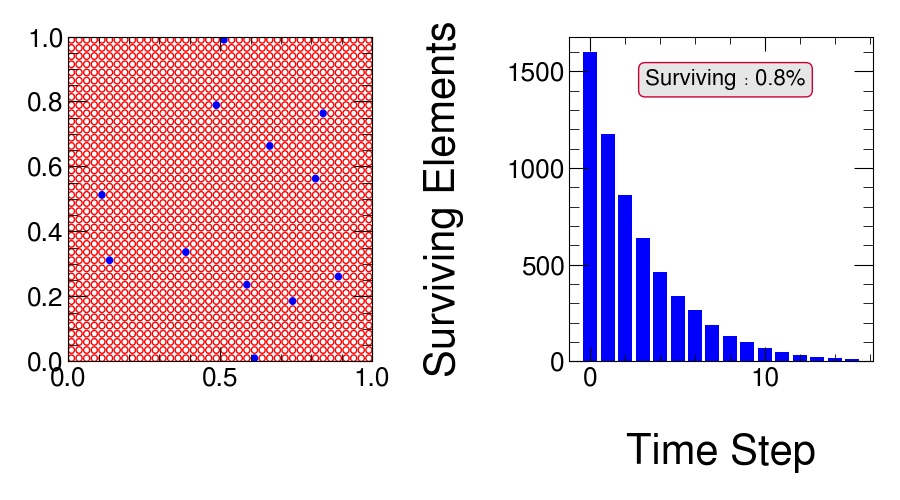

In [33]:
# Code for the Decay Game

muon_list = []
muon_counts = np.array([])


muon_figure, muon_axis = plt.subplots(figsize=(9,5))
plt.axis('off')

gridspec = muon_figure.add_gridspec(ncols=2, nrows=1, width_ratios=[1,1], height_ratios=[1])

N_per_row = 40
mu_spacing = 0.005

max_size = 1.0
decay_prob = 0.25

mu_size = (max_size - (N_per_row-1)*mu_spacing)/(2*N_per_row)

for xrow in np.arange( mu_size, max_size, 2*mu_size+mu_spacing ):
    for yrow in np.arange( mu_size, max_size, 2*mu_size+mu_spacing ):
        muon_list.append(Muon( decay_prob = decay_prob, avatar=Avatar(coordinates=(xrow,yrow), size=mu_size)))

        
#print(muon_list[-1].print())

muon_gameboard = muon_figure.add_subplot(gridspec[0,0])
muon_histogram = muon_figure.add_subplot(gridspec[0,1])

   
muon_counts = np.array([len(muon_list)])

draw_gameboard()

plt.show()
plt.tight_layout()


widgets.VBox(children=[advance_button, reset_button])


# What to Watch for When Playing the Decay Game

* How many time steps pass before the population declines to half its original number?
* How many time steps pass before the population declines to one-quarter its original number? What is the difference in the time steps between 100% and 50%, vs. 50% and 25%? Are they similar or very different?
* How many times steps pass before the population declines to about 36.8% of its original number? We'll come back to this strange question in a bit.

* **Go back to the game and play it again. Try answering these questions. Don't be afraid to reset the game and take a number of trials to answer each question. Average the results of your trials for each question.**

In [ ]:
# Data can go here:
time_to_half=2.5
time_to_quarter=(5.0+4.5+4.5)/3
time_to_368=3.5
print(time_to_half/math.log(2))

# My Observations

* I observed that it took about 2.5 time steps to get to 50% of the population surviving.
* I observed that it took about 4.5-5.0 times steps to get to 25% of the population surviving.
 * I note that the time step gap between 100% and 50% is about the same as the time step gap between 50% and 25%, within the limits of the precision of this game.
* I observed that it took about 3.5 steps to get to 36.8% of the population.

# The Calculus of Spontaneous Decay

## How does $\Delta N(t+dt)$ relate to $N(t)$? 

<IPython.core.display.Javascript object>


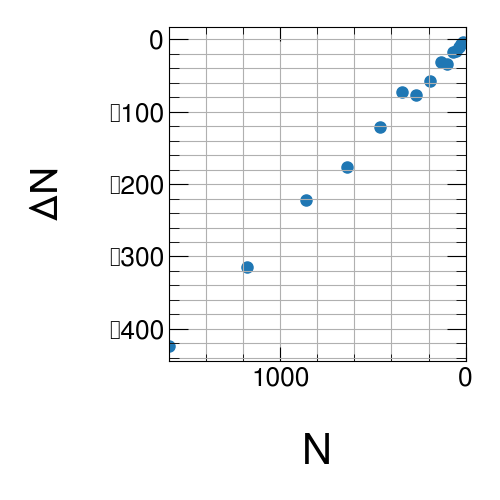

In [38]:
# This code plots the change per time step against the number remaining at the beginning of that step

N = []
dN = []

for i in np.arange(0, len(muon_counts)-1,1):
    N.append(muon_counts[i])
    dN.append(muon_counts[i+1] - muon_counts[i])

#print(N, dN)

figure, axis = plt.subplots(figsize=(5,5))
plt.scatter(N, dN)
axis.set_xlim(N[0], 0) 
plt.ylabel('$\Delta N$')
plt.xlabel('N')
plt.grid(which='both')
plt.tight_layout()


## Observations So Far

* A process like this, where in each equal step of time $dt$ each member of the population has a constant probability of decay, behaves as follows:
   * The population declines rapidly at first, then more slowly as it declines. It takes little time to lose more than half of the population, but a long time to lose the rest.
   * The decline in the population is linearly proportional to the remaining size of the population
   
We can express this last observation mathematically:

$$\frac{dN}{dt} = -\lambda N$$

This is a *differential equation*, one involving a parameter ($N$) and its derivative ($dN/dt$). The solution to this equation will be a *function* that depends on time. What function is it?

## Solving the Differential Equation

\begin{eqnarray*}
\frac{dN}{dt} & = &  -\lambda N \\
\frac{1}{N} dN & = & -\lambda dt \\
\int_{N_i}^{N_f} \frac{1}{N} dN & = & \int_{t_i}^{t_f} (-\lambda) dt \\
\left. \ln(N) \right|_{N_i}^{N_f} & = & -\lambda (t_f - t_i) \\
\ln(N_f) - \ln(N_i) & = & -\lambda \Delta t \\
\ln\left(\frac{N_f}{N_i}\right) & = & -\lambda \Delta t \\
\end{eqnarray*}

## Solution to the Differential Equation

$$N_f = N_i e^{-\lambda \Delta t}$$

What is the constant of proportionality, $\lambda$? We can determine this by setting $\Delta t = \lambda^{-1}$. At that special time, $N_f = N_i/e=0.368N_i$. That is, $\lambda^{-1} = \tau$ is the special time when the population declines to 36.8% of its original size.

$$N_f = N_i e^{-\Delta t/\tau}$$